In [32]:
!pip install pycountry

     ---------------------------------------- 6.3/6.3 MB 3.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

In [30]:
df = pd.read_csv("E:\Data Analysis\Excelerate Internship\Week 1\Resource\Csv_files\ApplicantData.csv")

In [32]:
df.head()

,App_ID,Country,University,Phone_Number
0,12345,India,Illinois Institute of Technology,9823241234
1,12345,India,Illinois Institute of Technology,8805617501
2,12345,India,Illinois Institute of Technology,18019011222
3,347397,Nigeria,Illinois Institute of Technology,7738599513
4,347397,Nigeria,Illinois Institute of Technology,919000000000


In [33]:
df.shape

(37882, 4)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37882 entries, 0 to 37881
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   App_ID        37881 non-null  object
 1   Country       37882 non-null  object
 2   University    37882 non-null  object
 3   Phone_Number  37882 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [35]:
df.describe()

,App_ID,Country,University,Phone_Number
count,37881,37882,37882,37882
unique,15416,856,1,4764
top,`,India,Illinois Institute of Technology,919000000000
freq,2676,12234,37882,5261


#@title Cleaning App_ID column from "ApplicantData.csv"

In [36]:
df = df.dropna(subset=['App_ID'])

In [37]:
df.tail()

,App_ID,Country,University,Phone_Number
37876,-,Bahrain,Illinois Institute of Technology,97334305522
37877,-,Bahrain,Illinois Institute of Technology,97336598776
37878,-,Bahrain,Illinois Institute of Technology,97338787272
37879,-,australia,Illinois Institute of Technology,61432347819
37880,-,Bahrain,Illinois Institute of Technology,97335911259


In [38]:
df = df[df['App_ID'].str.isdigit()]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33223 entries, 0 to 37861
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   App_ID        33223 non-null  object
 1   Country       33223 non-null  object
 2   University    33223 non-null  object
 3   Phone_Number  33223 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [40]:
df.describe()

,App_ID,Country,University,Phone_Number
count,33223,33223,33223,33223
unique,15175,817,1,2819
top,418630,India,Illinois Institute of Technology,919000000000
freq,37,11412,33223,4969


In [41]:
df['App_ID'] = df['App_ID'].astype(str)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33223 entries, 0 to 37861
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   App_ID        33223 non-null  object
 1   Country       33223 non-null  object
 2   University    33223 non-null  object
 3   Phone_Number  33223 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [43]:
df["App_ID"].nunique()

15175

In [44]:
df["App_ID"].unique()

array(['12345', '347397', '358065', ..., '98077675', '9876789', '425358'],
      dtype=object)

In [45]:
df["App_ID"].value_counts()

App_ID
418630          37
919000000000    27
920000000000    21
474311          20
451193          20
                ..
432487           1
434541           1
405450           1
420494           1
425358           1
Name: count, Length: 15175, dtype: int64

In [46]:
cleaned_App_ID = df.drop_duplicates(subset=['App_ID'], keep='first')

In [47]:
df["App_ID"].value_counts()

App_ID
418630          37
919000000000    27
920000000000    21
474311          20
451193          20
                ..
432487           1
434541           1
405450           1
420494           1
425358           1
Name: count, Length: 15175, dtype: int64

In [48]:
print(cleaned_App_ID["App_ID"].value_counts())


App_ID
12345     1
403759    1
424954    1
461877    1
424059    1
         ..
432051    1
428896    1
453325    1
424254    1
425358    1
Name: count, Length: 15175, dtype: int64


In [49]:
df = df.drop_duplicates(subset=['App_ID'], keep='first')
print(df["App_ID"].value_counts())

App_ID
12345     1
403759    1
424954    1
461877    1
424059    1
         ..
432051    1
428896    1
453325    1
424254    1
425358    1
Name: count, Length: 15175, dtype: int64


In [50]:
print("Unique App_IDs:", df["App_ID"].nunique())
print("Rows left:", len(df))

Unique App_IDs: 15175
Rows left: 15175


In [52]:
valid_countries = {}

for c in pycountry.countries:
    valid_countries[c.name.lower()] = c.name         # full name
    valid_countries[c.alpha_2.lower()] = c.alpha_2   # US, IN, FR is accpeted
    valid_countries[c.alpha_3.lower()] = c.alpha_3   # USA, IND, FRA is accpeted

In [53]:
df['Country'] = df['Country'].astype(str).str.strip().str.lower()

In [54]:
df['Country'] = df['Country'].map(valid_countries).fillna("Not Mentioned")

In [56]:

df['Phone_Number'] = df['Phone_Number'].astype(str).str.strip()

df['Phone_Number'] = df['Phone_Number'].where(
    df['Phone_Number'].str.isnumeric(), 
    "Not Mentioned"
)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15175 entries, 0 to 37100
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   App_ID        15175 non-null  object
 1   Country       15175 non-null  object
 2   University    15175 non-null  object
 3   Phone_Number  15175 non-null  object
dtypes: object(4)
memory usage: 592.8+ KB


In [58]:
df.head()

,App_ID,Country,University,Phone_Number
0,12345,India,Illinois Institute of Technology,9823241234
3,347397,Nigeria,Illinois Institute of Technology,7738599513
5,358065,India,Illinois Institute of Technology,920000000000
6,351333,India,Illinois Institute of Technology,13173701409
7,346435,India,Illinois Institute of Technology,917000000000


In [59]:
df.tail()

,App_ID,Country,University,Phone_Number
36409,478245,Saudi Arabia,Illinois Institute of Technology,967000000000
36874,502363,Ghana,Illinois Institute of Technology,233000000000
36989,98077675,Nigeria,Illinois Institute of Technology,2350000000000
36997,9876789,Ghana,Illinois Institute of Technology,233000000000
37100,425358,India,Illinois Institute of Technology,918000000000


In [60]:
# Save to new file
df.to_csv("E:\Data Analysis\Excelerate Internship\Week 1\Resource\Cleaned_Csv_files\CleanApplicantData.csv", index=False)


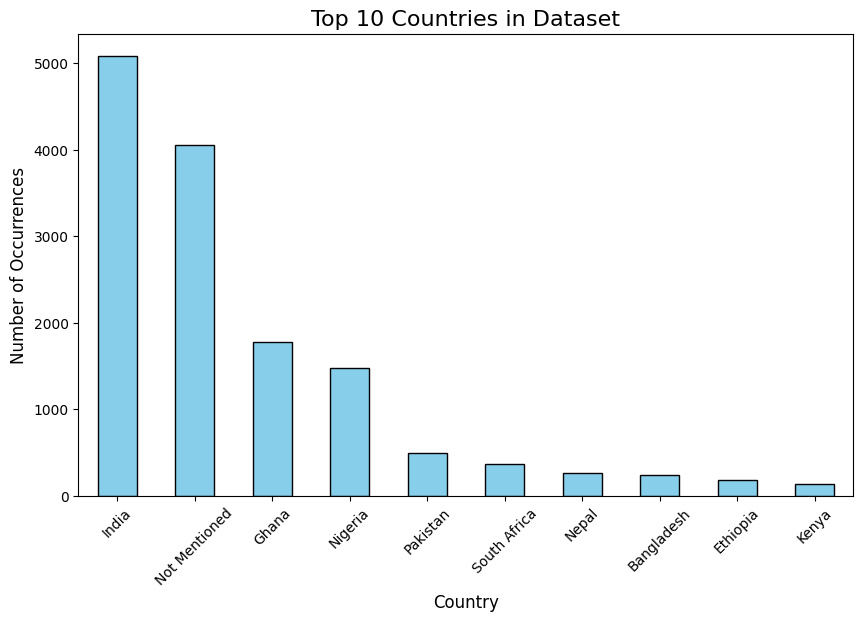

In [68]:
import matplotlib.pyplot as plt

top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 10 Countries in Dataset", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Occurrences", fontsize=12)
plt.xticks(rotation=45)
plt.show()


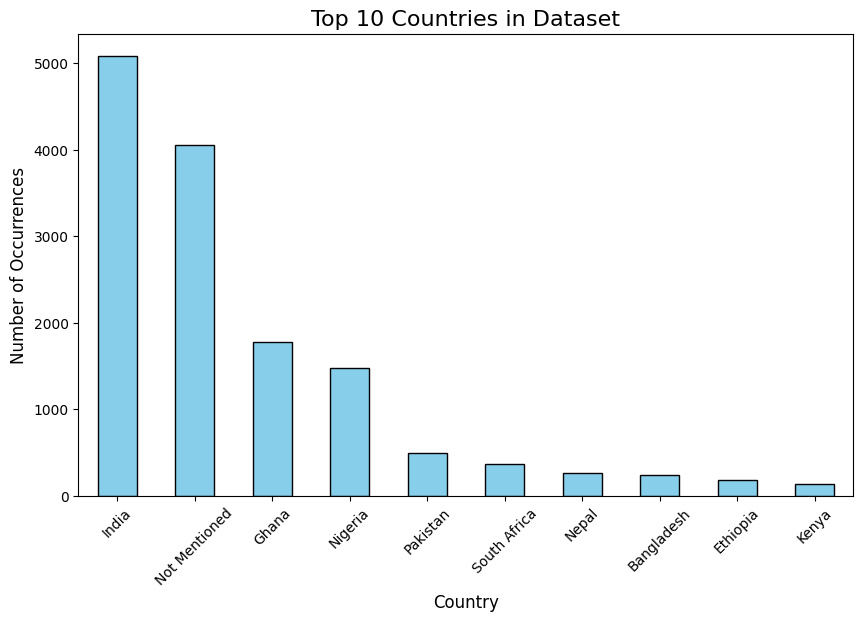

In [69]:
import matplotlib.pyplot as plt

top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 10 Countries in Dataset", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Occurrences", fontsize=12)
plt.xticks(rotation=45)
plt.show()
